<h1><center> TP2 : Pandas, Librairie d'analyse de données </center></h1>

Le but de ce TP est de se familiariser avec la classe 'pandas' de Python. Cette bibliothèque est souvent utilisée pour l'analyse des données et est pratique pour les outils de manipulation.
Nous considérons une étude de cas basée sur un ensemble de données contenant des informations sur les réservations de deux hôtels. L'Hôtel 1 est un complexe hôtelier et l'Hôtel 2 est un hôtel de centre-ville au Portugal. L'ensemble de données a été publié par https://www.sciencedirect.com/science/article/pii/S2352340918315191.

Nous listons d'abord les fonctions de base de pandas. La PARTIE 1 vise à utiliser pandas comme outils de visualisation pour une meilleure compréhension des données. La PARTIE 2 montre à quel point il est facile de combiner des dataframes "pandas" et des modèles "sklearn" pour créer des fonctionnalités supplémentaires et prévoir. 


En guise de devoirs, nous vous proposons un problème très concret qui est ouvert et pour lequel nous attendons votre créativité (comme d'habitude)! 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

# Petite intro à pandas

In [2]:
data = pd.read_csv("bookings.csv") 


In [3]:
data.head(5) # imprimer les 5 premières entrées des données

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.columns # donne les noms des colonnes

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Cet ensemble de données contient des informations sur les réservations de deux hôtels. L'Hôtel 1 est un complexe hôtelier et l'Hôtel 2 est un hôtel de centre-ville au Portugal. L'ensemble de données a été publié par https://www.sciencedirect.com/science/article/pii/S2352340918315191.

Ces données ont 32 columns :

1. **hotel** -- un des deux hotels
2. **is_canceled** -- valeur indiquant si la réservation a été annulée (1) ou non (0) 
3. **lead_time** -- nombre de jours écoulés entre la date d'entrée de la réservation dans le PMS et la date d'arrivée 
4. ....

Pour une description complète de chaque colonne, veuillez consulter : https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [5]:
data['country'] # on peut aussi voir chaque colonne du jeu de données

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [6]:
data['country'].unique() # liste toutes les valeurs présentes de manière unique dans la colonne

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [7]:
data.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

Cet ensemble de données contient 119390 réservations différentes. Certaines réservations ont des valeurs manquantes. 


In [8]:
data.values # Un data frame peut être converti en une numpy array:

array([['Resort Hotel', 0, 342, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 737, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 7, ..., 0, 'Check-Out', '2015-07-02'],
       ...,
       ['City Hotel', 0, 34, ..., 4, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 109, ..., 0, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 205, ..., 2, 'Check-Out', '2017-09-07']],
      dtype=object)

In [9]:
data['is_canceled'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Cependant, ce tableau ne peut pas être directement alimenté dans un modèle scikit-learn.

1. les valeurs sont hétérogènes (des chaînes de caractères pour les catégories, des entiers et des nombres à virgule)
2. certaines valeurs d'attributs sont manquantes 

# Prédiction d'annulations : Partie I -- visualisation

**Nos buts** Le but de cette partie est de fournir quelques exemples de visualisation combinant ```pandas```, ```matplotlib```, ```seaborn```. 

Nous examinerons une tâche très naturelle et pratique - prédire l'annulation d'une réservation donnée. Bien sûr, le premier instinct du 'praticien ML' moderne est de mettre toutes les données sur un réseau de neurone et d'effectuer un tas de réglages fins. Il y a vraiment beaucoup de problèmes avec une telle approche. Règle générale : explorez vos données avant de créer des pipelines ML! Il est toujours plus intéressant d'étudier les données et de trouver des modèles interprétables. 

Pandas permet de manipuler l'ensemble de données d'une manière très pratique. Ceux qui connaissent SQL l'apprécieront certainement!

En tant que première tâche de visualisation, comprenons quels mois ont le plus grand nombre d'annulations.
Nous commençons par créer un nouvel ensemble de données contenant les informations que nous aimerions tracer. 

In [10]:

'''
 On crée un jeu de données pour chaque hôtel .groupby("arrival_date_month") regroupera les observations par mois
 et la fonction .count() comptera simplement le nombre de réservations pour chaque mois
'''
n_reserv_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
#n_country_H1 = data.loc[(data["country"])]
n_cancel_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

# On fait la même chose pour le deuxième hôtel
n_reserv_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
n_cancel_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()




In [11]:
n_reserv_H1.head() # encore une fois, nous pouvons jeter un oeil aux 5 meilleures entrées 

arrival_date_month
April       3609
August      4894
December    2648
February    3103
January     2193
Name: hotel, dtype: int64

In [12]:
n_reserv_H1['April'] # nombre de réservations pour le Resort Hotel en avril 

3609

In [13]:
n_cancel_H1['April'] # nombre d'annulations pour le Resort Hotel en avril

1059

In [134]:
# enfin, on rassemble tout 


data_visualH1 = pd.DataFrame({"hotel": "Resort Hotel",
                                "month": list(n_reserv_H1.index),
                                "n_booking": list(n_reserv_H1.values),
                                "n_cancel": list(n_cancel_H1.values)})
                              
data_visualH2 = pd.DataFrame({"hotel": "City Hotel",
                                "month": list(n_reserv_H2.index),
                                "n_booking": list(n_reserv_H2.values),
                                "n_cancel": list(n_cancel_H2.values)})

data_visual = pd.concat([data_visualH1, data_visualH2], ignore_index=True)

# remarquez à quel point il est facile d'ajouter une nouvelle colonne. Nous écrivons simplement ce qui suit 
data_visual["percent_cancel"] = data_visual["n_cancel"] / data_visual["n_booking"] * 100 # pourcentage d'annulations

In [135]:
data_visual.head() # nos données finales

,hotel,month,n_booking,n_cancel,percent_cancel
0,Resort Hotel,April,3609,1059,29.343308
1,Resort Hotel,August,4894,1637,33.449121
2,Resort Hotel,December,2648,631,23.829305
3,Resort Hotel,February,3103,795,25.620367
4,Resort Hotel,January,2193,325,14.819881


<IPython.core.display.Javascript object>


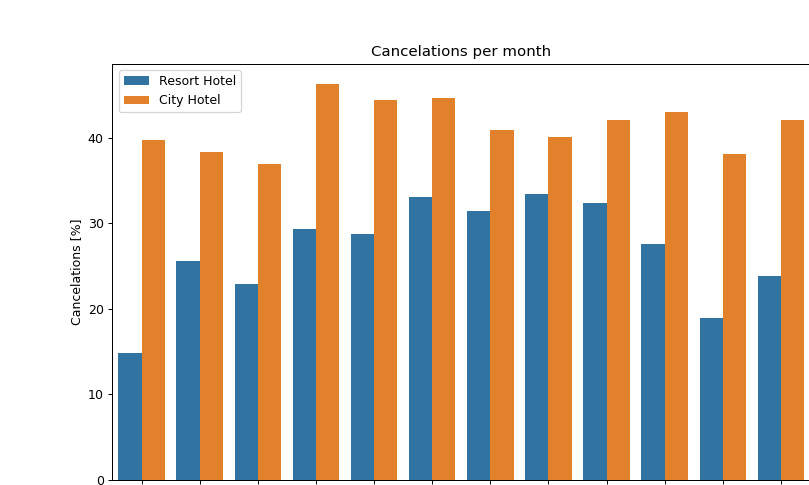

In [137]:
# Fournir des graphes est simple une fois que nous avons un bon jeu de données. 
plt.figure(figsize=(10, 6))
sns.barplot(x = "month", y = "percent_cancel" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"] , data=data_visual,
           order = ["January", "February", "March","April","May","June","July","August","September","October","November","December"])
plt.title("Cancelations per month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]")
plt.legend()
plt.show()

Le graphe précédent est sympa, mais l'ordre des mois est très ennuyeux!  

**Question 1.** Proposez une solution qui réorganisera le barplot ci-dessus en utilisant l'ordre chronologique mensuelle standard. Astuce: utilisez la fonction ```pd.Categorical()``` de pandas. 

In [17]:
 order = ["January", "February", "March","April","May","June","July","August","September","October","November","December"]

**Question 2.** Fournissez une interprétation du graphique ci-dessus. 

De façon visuelle, on voit un maximum d'annulation de réservations est au mois d'Avril pour les city hotel, le maximum d'annulation pour les resort hotel est au mois d'août. Le minimum d'annulation pour les city hotel est au mois de Mars, on voit également qu'il y a moins d'annulation pour les resort hotel que les city hotel.

**Question 3.** Quel sont les deux pays d'origine qui font le plus de réservations dans chaque hôtel ?

Plusieurs méthodes, soit au global soit pour chaque hôtel en réutilisant la méthode plus haut et pour finir une méthode où on filtre directement dans le jeu de données

In [18]:
# Méthode 1 

d = data['country'].value_counts().sort_values(ascending=False)[:2]
#d["hotel"]
print(d)


PRT    48590
GBR    12129
Name: country, dtype: int64


In [19]:
# Méthode 2 du TP 

n_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("country")["hotel"].count()
n_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("country")["hotel"].count()

data_visualH1 = pd.DataFrame({"hotel": "Resort Hotel",
                                "country": list(n_H1.index),
                                "n_booking": list(n_H1.values)})
data_visualH2 = pd.DataFrame({"hotel": "City Hotel",
                                "country": list(n_H2.index),
                                "n_booking": list(n_H2.values)})
data_visual = pd.concat([data_visualH1, data_visualH2], ignore_index=True)

maxH1=data_visualH1.sort_values(by=['n_booking'],ascending=False).head(2)
maxH2=data_visualH2.sort_values(by=['n_booking'],ascending=False).head(2)
data_visualMax = pd.concat([maxH1, maxH2], ignore_index=True)
print(data_visualMax)



          hotel country  n_booking
0  Resort Hotel     PRT      17630
1  Resort Hotel     GBR       6814
2    City Hotel     PRT      30960
3    City Hotel     FRA       8804


In [20]:
# Méthode 3 
data_city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

country_number_bookings_city = data_city['country'].value_counts().reset_index()
country_number_bookings_city.columns = ['country', 'No of guests']
country_number_bookings_city.head(2)

,country,No of guests
0,PRT,10879
1,FRA,7081


In [21]:
# Méthode 3

data_resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
country_number_bookings_resort = data_resort['country'].value_counts().reset_index()
country_number_bookings_resort.columns = ['country', 'No of guests']
country_number_bookings_resort.head(2)

,country,No of guests
0,PRT,10192
1,GBR,5923


<IPython.core.display.Javascript object>


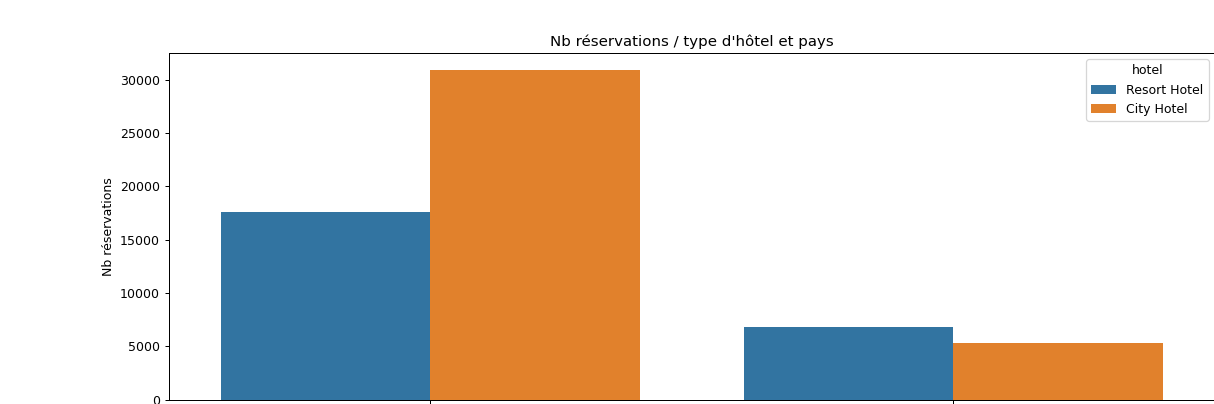

Text(0.5, 1.0, "Nb réservations / type d'hôtel et pays")

In [131]:
# données utilisées 
d = data['country'].value_counts().sort_values(ascending=False)[:2]

#taille de la figure
plt.figure(figsize=(15,5))

#tracer le graphique
sns.countplot(x='country', hue='hotel', data=data[data['country'].isin(d.index)])

#infos du graphique
plt.xlabel("Pays")
plt.ylabel("Nb réservations")
plt.title("Nb réservations / type d'hôtel et pays")

**Question 4.** Indiquez le nombre d'annulations pour les clients répétés et non répétés pour les deux hôtels.  

In [23]:
#n_reserv_H3 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("is_repeated_guest")["hotel"].count()
n_cancel_H3 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("is_repeated_guest")["is_canceled"].sum()

#n_reserv_H4 = data.loc[(data["hotel"] == "City Hotel")].groupby("is_repeated_guest")["hotel"].count()
n_cancel_H4 = data.loc[(data["hotel"] == "City Hotel")].groupby("is_repeated_guest")["is_canceled"].sum()





In [24]:
n_cancel_H3.head()  #111 clients 


is_repeated_guest
0    11011
1      111
Name: is_canceled, dtype: int64

In [25]:
n_cancel_H4.head()  #441 clients 


is_repeated_guest
0    32661
1      441
Name: is_canceled, dtype: int64

<IPython.core.display.Javascript object>


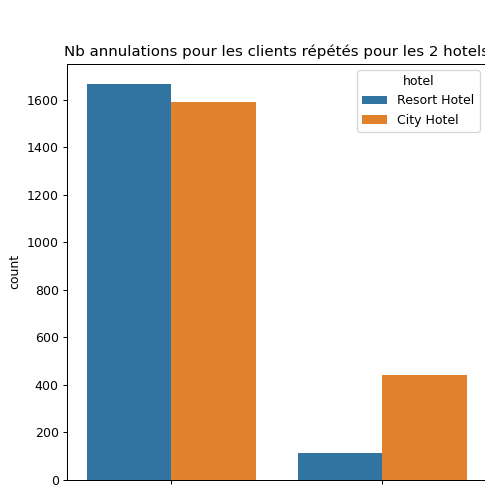

[]

In [130]:
plt.figure(figsize=(6, 6))

sns.countplot(x="is_canceled", hue='hotel', data= data.loc[(data["is_repeated_guest"] == 1)])

plt.title("Nb annulations pour les clients répétés pour les 2 hotels", fontsize=12)
plt.plot()

<IPython.core.display.Javascript object>


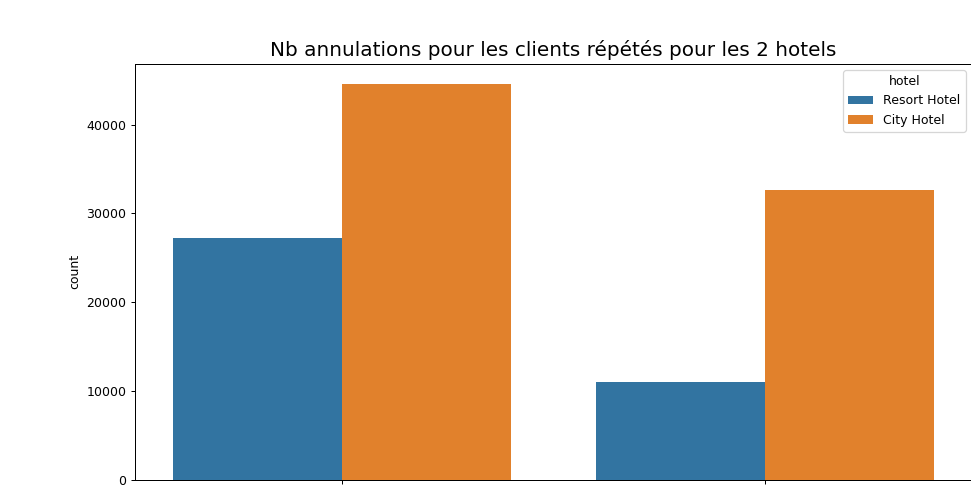

[]

In [129]:
plt.figure(figsize=(12, 6))

sns.countplot(x="is_canceled", hue='hotel', data= data.loc[(data["is_repeated_guest"] == 0)])


plt.title("Nb annulations pour les clients répétés pour les 2 hotels", fontsize=16)
plt.plot()

La plupart des clients de ces deux hôtels ne sont pas répétés, tandis que les clients répétés sont moins susceptibles d'annuler. 

<IPython.core.display.Javascript object>


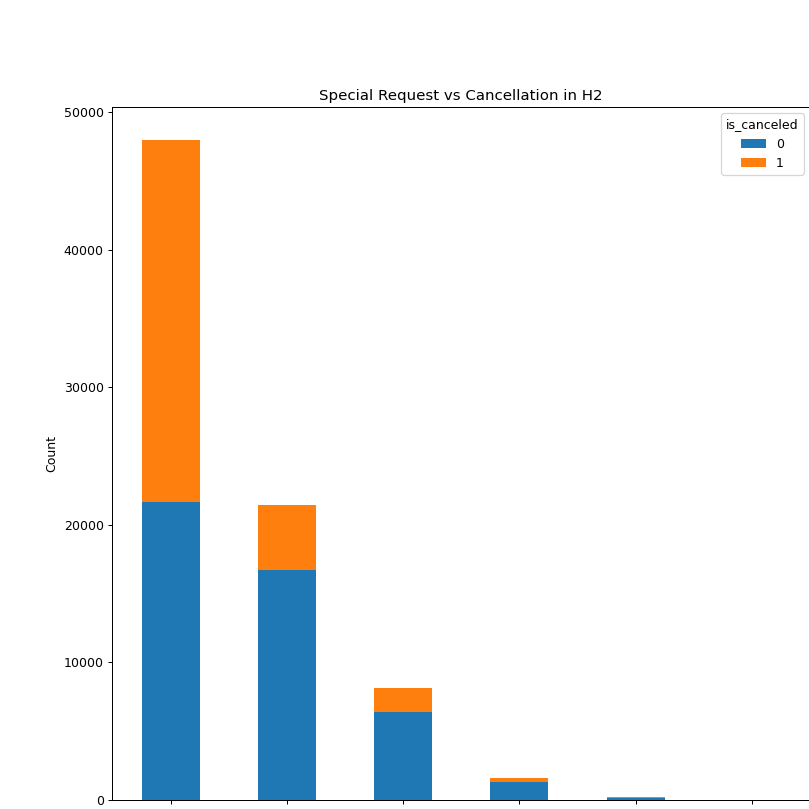

In [126]:
data_req = data[(data['hotel'] == 'City Hotel')].groupby(['total_of_special_requests', 'is_canceled']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(10,10))
plt.title('Special Request vs Cancellation in H2')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)
plt.show()

La plupart des réservations dans l'hôtel de ville n'ont pas de demandes spéciales et l'annulation dans ce cas est presque de 50/50. Cependant, lorsque des demandes spéciales sont effectuées, le taux d'annulation est nettement inférieur. 

**Question 5.** Faites le même graphe pour l'hôtel de villégiature. Faites vos conclusions.

<IPython.core.display.Javascript object>


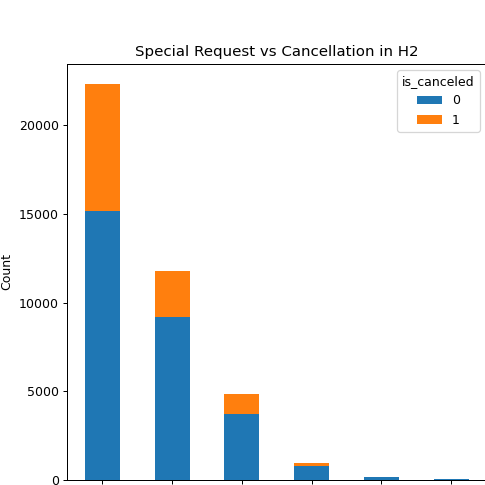

Text(0, 0.5, 'Count')

In [125]:
data_req = data[(data['hotel'] == 'Resort Hotel')].groupby(['total_of_special_requests', 'is_canceled']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H2')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)

Il y a moins de special request dans ce type d'hôtel, on remarque également qu'il y a moins d'annulations.

# Prédiction d'annulations : Partie II -- ML

**Nos buts** Le message principal ici est - ne réinventez pas la roue. Les quelques lignes de code suivantes mettent en évidence la simplicité avec laquelle nous pouvons combiner des dataframes ```pandas``` et des modèles ```sklearn```. En apprenant quelques outils simples (i.e. ```pipeline```, ```gridsearchcv```) notre code devient lisible, compact et peut être utilisé pour créer des fonctionnalités supplémentaires.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [31]:
numeric_features = ["lead_time", "arrival_date_week_number", "total_of_special_requests"]
categorical_features = ["hotel", "market_segment","deposit_type","customer_type"]
features = numeric_features + categorical_features
X = data.drop(["is_canceled"], axis=1)[features]
y = data["is_canceled"]

Avant d'utiliser un algorithme ML de sklearn, nous devons gérer les valeurs manquantes. Il n'y a pas de réponse unique sur la façon de traiter les valeurs manquantes dans vos données. Nous utiliserons l'approche la plus simple (peut-être). Tout d'abord, si la variable est numérique et est manquante, nous allons la remplacer par zéro. Deuxièmement, si la variable est catégorielle et est manquante, nous allons définir une nouvelle catégorie et l'appeler ```Not defined```.

In [32]:
numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

**Question:** Qu'est-ce que ```OneHotEncoder()``` ? Pourquoi l'utilise-t-on dans notre cas ?

Imaginez maintenant une situation où vous voulez essayer beaucoup de modèles différents et pour chaque modèle vous voulez faire une validation croisée pour sélectionner les meilleurs hyperparamètres. En plus de cela, vous souhaitez prétraiter les données afin de fournir quelque chose de significatif dans chaque méthode.

Le morceau de code suivant montre comment le faire. 

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
num_d = X.select_dtypes(include='number')
X[num_d.columns] = sc.fit_transform(num_d)

In [34]:
 from sklearn.ensemble import RandomForestClassifier


models = [("logreg", LogisticRegression(max_iter=500)),
          ("randomF", RandomForestClassifier())]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)},
        "randomF" :{'randomF__max_depth':  [2, None],
        'randomF__max_features': [2, 15],
        'randomF__min_samples_split': [2, 15],
        'randomF__min_samples_leaf': [2, 15],
        'randomF__criterion': ["gini", "entropy"]
                   }
        }
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

Results for logreg
{'mean_fit_time': array([0.82284602, 0.89589938, 1.06779051, 0.95247499, 0.8171916 ]), 'std_fit_time': array([0.10002083, 0.16033068, 0.25141857, 0.19833274, 0.04553615]), 'mean_score_time': array([0.05574385, 0.05674171, 0.05358044, 0.05541388, 0.05324753]), 'std_score_time': array([0.00339371, 0.00169679, 0.00341817, 0.00318545, 0.00339402]), 'param_logreg__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg__C': 0.25}, {'logreg__C': 0.5}, {'logreg__C': 1.0}, {'logreg__C': 2.0}, {'logreg__C': 4.0}], 'split0_test_score': array([0.70128402, 0.7000779 , 0.68628289, 0.67618162, 0.66595472]), 'split1_test_score': array([0.78262181, 0.78242079, 0.78232028, 0.78219464, 0.78219464]), 'split2_test_score': array([0.73587798, 0.73582772, 0.73582772, 0.73630516, 0.73602875]), 'mean_test_score': array([0.73992793, 0.73944213, 0.73481029, 0.73156047, 0.72805

In [35]:
print('Results for {}'.format(name))
print(clf.cv_results_)

Results for randomF
{'mean_fit_time': array([ 1.52622318,  1.4112397 ,  1.34701173,  1.32803996,  3.28940543,
        3.27725522,  3.19970711,  3.28540111,  4.47450113,  4.04419065,
        2.73529426,  2.91083725, 11.00421468, 10.86559788,  9.38480639,
       11.50392095,  1.46781993,  1.46315225,  1.49127142,  1.47830455,
        3.75846982,  3.72569402,  3.80257479,  3.741503  ,  5.6436313 ,
        5.06472365,  3.04728738,  3.16026632, 11.85718226, 10.92799822,
       10.27686588, 12.18265287]), 'std_fit_time': array([0.02955268, 0.0528714 , 0.02629122, 0.01289172, 0.0092445 ,
       0.05921441, 0.09396831, 0.02579164, 0.09028016, 0.02492839,
       0.07246795, 0.06795784, 0.17703526, 0.44940877, 0.04627143,
       1.0723245 , 0.05779471, 0.02096114, 0.05847572, 0.03183546,
       0.1175626 , 0.08908706, 0.0940243 , 0.09710603, 0.18223709,
       0.47621261, 0.10897081, 0.22677647, 0.4904721 , 0.41800757,
       0.63932034, 0.29050878]), 'mean_score_time': array([0.25792416, 0.2434

In [ ]:
print(clf.best_score_)

**Question:** Dans l'exemple précédent, nous rencontrons à nouveau le problème de convergence. Bien sûr, nous pouvons définir un nombre plus élevé d'itérations, mais cela prend du temps. Comme vous l'avez vu, une normalisation appropriée peut résoudre le problème. Insérez une étape de normalisation dans le pipeline. Notez que nous ne voulons pas normaliser les données catégorielles, cela n'a tout simplement pas de sens. Veillez à ne normaliser que les données numériques. Est-ce que ça a résolu l'avertissement? 

**Question:** Comme nous pouvons le voir, le code précédent n'utilise que la régression logistique. Modifiez le code ci-dessus en insérant votre méthode ML préférée. 

**Remark:** Notez que dans cette partie, nous n'avons sélectionné qu'un petit sous-ensemble de fonctionnalités. Nous aurions pu également utiliser d'autres fonctionnalités. 

# Les devoirs

**L'histoire !**
Vous êtes un data scientist travaillant pour l'hôtel, un jour le manager vient vous dire :

Dans nos hôtels, nous avons la possibilité d'offrir une place de parking, ce qui coûte de l'argent. Apparemment, tous les clients ne sont pas conscients que nous avons une telle option. Je veux vraiment proposer des places de parking à tous ceux qui en ont besoin, car l'hôtel peut gagner plus d'argent comme ça. Écoutez, je peux envoyer une notification par SMS à nos clients. Bien sûr, les SMS ne sont pas gratuits et, de plus, les gens sont très en colère s'ils reçoivent des notifications stupides sans raison. Pour chaque nouvelle réservation, j'aimerais décider si je dois ou non envoyer la notification au client.  

**Problème** Explorez vos données pour aider le manager et construire un algorithme de prédiction, en utilisant le modèle ci-dessus comme source d'inspiration. 

**Attention!** Certaines colonnes ne sont pas réellement disponibles au moment de la réservation. Par exemple, la colonne cible ```is_canceled``` de la partie précédente ne peut clairement pas être observée au moment où nous devons décider d'envoyer le SMS. 

In [36]:
dataDevoir = pd.read_csv("bookings.csv") 

In [37]:
dataDevoir = dataDevoir.drop(["reservation_status"], axis=1)
dataDevoir = dataDevoir.drop(["is_canceled"], axis=1)

In [38]:
#Je commence par retravailler la nouvelle variable cible : required_car_parking_spaces 
def recode_var(data) :
    if data >= 1 :
        return 1 
    else :
        return 0 

In [39]:
# on applique
dataDevoir['required_car_parking_spaces'] = dataDevoir['required_car_parking_spaces'].apply(recode_var)


In [40]:
# la recodification a bien fonctionné 
#dataDevoir['required_car_parking_spaces'].values
dataDevoir['required_car_parking_spaces'].unique()

    

array([0, 1], dtype=int64)

In [41]:
n_reserv_H1 = dataDevoir.loc[(dataDevoir["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
n_parking_H1 = dataDevoir.loc[(dataDevoir["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["required_car_parking_spaces"].sum()

# On fait la même chose pour le deuxième hôtel
n_reserv_H2 = dataDevoir.loc[(dataDevoir["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
n_parking_H2 = dataDevoir.loc[(dataDevoir["hotel"] == "City Hotel")].groupby("arrival_date_month")["required_car_parking_spaces"].sum()

In [42]:
# on regroupe 
data_vizH1 = pd.DataFrame({"hotel": "Resort Hotel",
                                "month": list(n_reserv_H1.index),
                                "n_booking": list(n_reserv_H1.values),
                                "n_parking": list(n_parking_H1.values)})
                           
data_vizH2 = pd.DataFrame({"hotel": "City Hotel",
                                "month": list(n_reserv_H2.index),
                                "n_booking": list(n_reserv_H2.values),
                                "n_parking": list(n_parking_H2.values)})

data_viz = pd.concat([data_vizH1, data_vizH2], ignore_index=True)
data_viz["percent_parking"] = data_viz["n_parking"] / data_viz["n_booking"] * 100 # pourcentage d'annulations

<IPython.core.display.Javascript object>


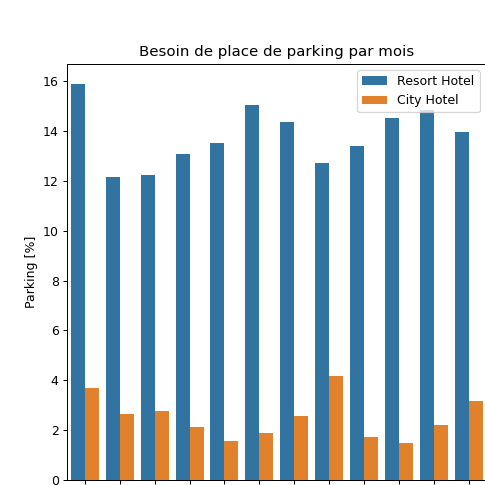

In [124]:
plt.figure(figsize=(6, 6))
sns.barplot(x = "month", y = "percent_parking" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"] , data=data_viz,
           order = ["January", "February", "March","April","May","June","July","August","September","October","November","December"])
plt.title("Besoin de place de parking par mois")
plt.xticks(rotation=45)
plt.ylabel("Parking [%]")
plt.legend()
plt.show()

Pour chaque mois de l'année, les clients demandent plus souvent une place de parking en 'Resort Hotel'

In [44]:
n_reserv_test = dataDevoir.loc[(dataDevoir["hotel"] == "Resort Hotel")].groupby("is_repeated_guest")["hotel"].count()
n_parking_test = dataDevoir.loc[(dataDevoir["hotel"] == "Resort Hotel")].groupby("is_repeated_guest")["required_car_parking_spaces"].sum()

n_reserv_test2 = dataDevoir.loc[(dataDevoir["hotel"] == "City Hotel")].groupby("is_repeated_guest")["hotel"].count()
n_parking_test2 = dataDevoir.loc[(dataDevoir["hotel"] == "City Hotel")].groupby("is_repeated_guest")["required_car_parking_spaces"].sum()


In [45]:
n_reserv_test3 = dataDevoir.loc[(dataDevoir["hotel"] == "Resort Hotel")]["hotel"].count()
n_parking_test3 = dataDevoir.loc[(dataDevoir["hotel"] == "Resort Hotel")]["required_car_parking_spaces"].sum()

n_reserv_test4= dataDevoir.loc[(dataDevoir["hotel"] == "City Hotel")]["hotel"].count()
n_parking_test4 = dataDevoir.loc[(dataDevoir["hotel"] == "City Hotel")]["required_car_parking_spaces"].sum()


In [46]:
print(n_parking_test3)

5490


In [47]:
print(n_parking_test4)

1926


<IPython.core.display.Javascript object>


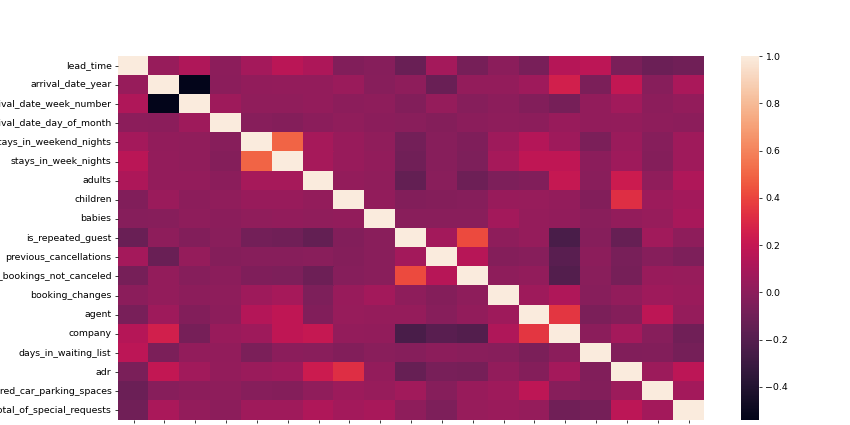

In [123]:
plt.figure(dpi=75, figsize=(14, 7))
plt.tick_params(axis='both', which='major', labelsize=10)

corr_df=dataDevoir.corr()
sns.heatmap(corr_df)

plt.show()

In [49]:
numeric_features = ["lead_time", "arrival_date_week_number", "total_of_special_requests"]
categorical_features = ["hotel", "market_segment","deposit_type","customer_type"]
features = numeric_features + categorical_features
Xi = dataDevoir[features]
yi = dataDevoir["required_car_parking_spaces"]

In [50]:
from sklearn.preprocessing import StandardScaler

sc2 = StandardScaler()
num_d2 = X.select_dtypes(include='number')
X[num_d2.columns] = sc.fit_transform(num_d2)

In [51]:
numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])



In [52]:
models = [("logreg", LogisticRegression(max_iter=1500))]#,
        #  ("randomF", RandomForestClassifier())]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)},
        #"randomF" :{'randomF__max_depth':  [2, None],
        #'randomF__max_features': [2, 15],
        #'randomF__min_samples_split': [2, 15],
       # 'randomF__min_samples_leaf': [2, 15],
       # 'randomF__criterion': ["gini", "entropy"]
         #          }
        }
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)
    

Results for logreg
{'mean_fit_time': array([0.79273121, 0.83532937, 1.13152154, 1.059304  , 0.87576469]), 'std_fit_time': array([0.14175157, 0.17925513, 0.32732322, 0.37400149, 0.04131455]), 'mean_score_time': array([0.0565757 , 0.05624294, 0.08918993, 0.05740794, 0.06489539]), 'std_score_time': array([0.00553434, 0.00326919, 0.0177777 , 0.00741589, 0.00603177]), 'param_logreg__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg__C': 0.25}, {'logreg__C': 0.5}, {'logreg__C': 1.0}, {'logreg__C': 2.0}, {'logreg__C': 4.0}], 'split0_test_score': array([0.70128402, 0.7000779 , 0.68628289, 0.67603086, 0.66595472]), 'split1_test_score': array([0.78262181, 0.78244591, 0.78221977, 0.78219464, 0.78219464]), 'split2_test_score': array([0.73582772, 0.73582772, 0.73582772, 0.73605387, 0.73628003]), 'mean_test_score': array([0.73991118, 0.73945051, 0.73477679, 0.73142646, 0.72814

In [53]:
print(clf.best_score_)

0.7399111811419736


In [54]:
from sklearn import metrics

pred = clf.predict(X)
print ("------Classification Report")
print (metrics.classification_report(y, pred))

------Classification Report
              precision    recall  f1-score   support

           0       0.76      0.94      0.84     75166
           1       0.84      0.50      0.63     44224

    accuracy                           0.78    119390
   macro avg       0.80      0.72      0.74    119390
weighted avg       0.79      0.78      0.77    119390



## Même cas mais avec réseaux de neurones


In [95]:
data2 = pd.read_csv("bookings.csv") # recharge les données

In [96]:
# on retire cette variable car elle est équivalente à la variable cible
data2 = data2.drop(["reservation_status"], axis=1)
data2 = data2.drop(["is_canceled"], axis=1)
 

In [97]:
data2.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,2015-07-03


In [98]:
data2.shape

(119390, 30)

In [99]:
 data2['required_car_parking_spaces'] = data2['required_car_parking_spaces'].apply(recode_var)

In [100]:
for col_name in data2.columns:
       if(data2[col_name].dtype == 'object'):
           data2[col_name]= data2[col_name].astype('category')
           data2[col_name] = data2[col_name].cat.codes

In [101]:
data2=data2.fillna(0)
print (data2.isna().any(axis=-0))

hotel                             False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False
days_in_waiting_list              False


In [102]:
data2.shape

(119390, 30)

In [103]:
y=np.array(data2.pop('required_car_parking_spaces'))
             

x=data2.values


In [104]:
data2.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status_date
0,1,342,2015,5,27,1,0,0,2,0.0,...,2,3,0,0.0,0.0,0,2,0.0,0,121
1,1,737,2015,5,27,1,0,0,2,0.0,...,2,4,0,0.0,0.0,0,2,0.0,0,121
2,1,7,2015,5,27,1,0,1,1,0.0,...,2,0,0,0.0,0.0,0,2,75.0,0,122
3,1,13,2015,5,27,1,0,1,1,0.0,...,0,0,0,304.0,0.0,0,2,75.0,0,122
4,1,14,2015,5,27,1,0,2,2,0.0,...,0,0,0,240.0,0.0,0,2,98.0,1,123


In [90]:
#pip install -- tensorflow

In [105]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

x_train,x_test,y_train,y_test=train_test_split(x,y)


In [92]:
#tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output

In [108]:
epochs=10

model = keras.Sequential([
    keras.layers.Dense(32,input_shape=(29,),activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=epochs,validation_split=0.1,verbose=0)

In [109]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


<IPython.core.display.Javascript object>


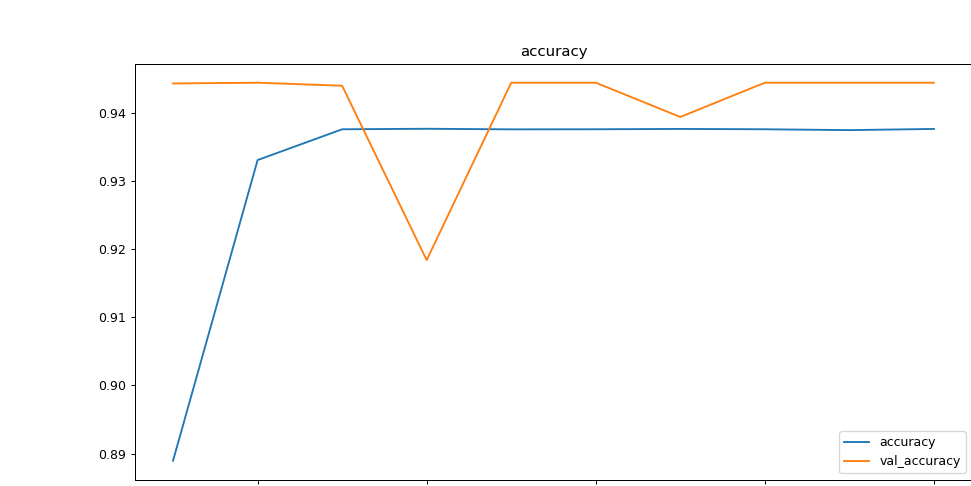

In [122]:
history=history.history
epochs_num=np.arange(1,epochs+1)

plt.figure(figsize=(12,6))
plt.title('accuracy')
plt.plot(epochs_num,history['accuracy'],label='accuracy')
plt.plot(epochs_num,history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()





<IPython.core.display.Javascript object>


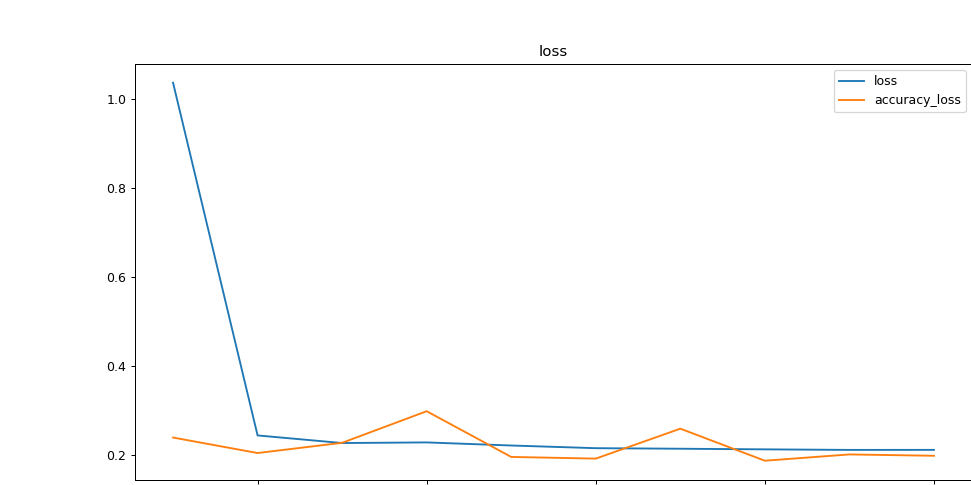

In [121]:
plt.figure(figsize=(12,6))
plt.title('loss')
plt.plot(epochs_num,history['loss'],label='loss')
plt.plot(epochs_num,history['val_loss'],label='accuracy_loss')
plt.legend()
plt.show()

In [119]:
comp=model.predict(x_test)
comp=np.array([np.argmax(u) for u in comp])
cm = confusion_matrix(y_true=y_test, y_pred=comp)
plot_confusion_matrix(cm=cm,classes=['0','1'],title='Confusion Matrix')
plt.show()

933/933 [==============================] - 1s 680us/step
Confusion matrix, without normalization
[[27953     0]
 [ 1895     0]]


<IPython.core.display.Javascript object>


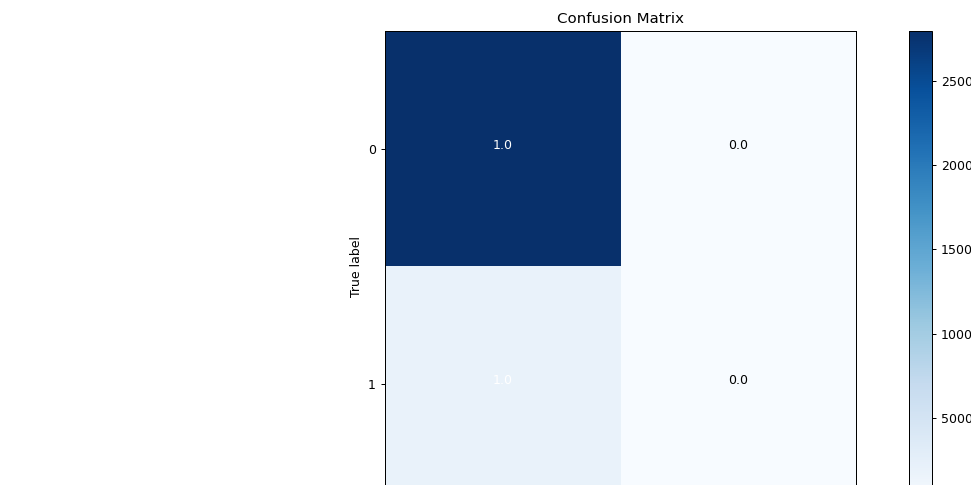

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]
F1 score 0.0


In [120]:
plt.figure(figsize=(12,6))
cm = confusion_matrix(y_true=y_test, y_pred=comp)
plot_confusion_matrix(cm=cm,classes=['0','1'],title='Confusion Matrix',normalize=True)
plt.show()
print('F1 score '+str(f1_score(y_true=y_test,y_pred=comp)))